In [23]:
import pandas as pd

billdf = pd.read_csv("../Data/summarized_bills.csv")

In [24]:
shortdf = pd.read_csv("../Data/shorter_summaries.csv")

In [2]:
billdf

,Unnamed: 0.1,Unnamed: 0,Bill Number,Raw Text,summary
0,2,2,117hr1057enr,This Act may be cited as the The Congress find...,This Act may be cited as the The Congress find...
1,9,9,117hr1082enr,This Act may be cited as the Not later than 1 ...,This Act may be cited as the Not later than 1 ...
2,12,12,117hr1095enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
3,16,16,117hr1154enr,This Act may be cited as the In this Act:The t...,This Act may be cited as the In this Act:The t...
4,18,18,117hr1170enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
...,...,...,...,...,...
147,3919,3919,117hr8982enr,This Act may be cited as the Subchapter III of...,This Act may be cited as the Subchapter III of...
148,4148,4148,117hr91enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
149,4255,4255,117hr92enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...
150,4267,4267,117hr9308enr,The facility of the United States Postal Servi...,The facility of the United States Postal Servi...


In [3]:
billdf['Raw Text']

0      This Act may be cited as the The Congress find...
1      This Act may be cited as the Not later than 1 ...
2      The facility of the United States Postal Servi...
3      This Act may be cited as the In this Act:The t...
4      The facility of the United States Postal Servi...
                             ...                        
147    This Act may be cited as the Subchapter III of...
148    The facility of the United States Postal Servi...
149    The facility of the United States Postal Servi...
150    The facility of the United States Postal Servi...
151    The facility of the United States Postal Servi...
Name: Raw Text, Length: 152, dtype: object

In [95]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def preprocess_text(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)
    
    # Remove stopwords and punctuation from each sentence
    stop_words = set(stopwords.words('english'))
    preprocessed_sentences = []
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        words = [word.lower() for word in words if word.isalnum()]
        words = [word for word in words if word not in stop_words]
        preprocessed_sentences.append(' '.join(words))
    
    return preprocessed_sentences

def calculate_similarity(reference_text, generated_summary):
    # Preprocess the reference text and generated summary
    preprocessed_reference = preprocess_text(reference_text)
    preprocessed_summary = preprocess_text(generated_summary)
    
    # Create a CountVectorizer to convert text into a matrix of token counts
    vectorizer = CountVectorizer().fit_transform(preprocessed_reference + preprocessed_summary)
    
    # Calculate cosine similarity between the reference text and generated summary
    similarity_matrix = cosine_similarity(vectorizer[-len(preprocessed_summary):], vectorizer[:-len(preprocessed_summary)])
    similarity_score = similarity_matrix.mean()
    
    return similarity_score



In [96]:
similarity_scores = []

for i in range(0, len(list(billdf['Raw Text']))):
    sim = calculate_similarity(list(billdf['Raw Text'])[i], list(billdf['summary'])[i])
    similarity_scores.append(sim)

In [6]:
similarity_scores

[0.36589344361522164,
 0.999999999999999,
 1.0000000000000002,
 1.0000000000000016,
 0.9999999999999998,
 1.0000000000000002,
 0.7544590255137171,
 1.0,
 1.0000000000000002,
 0.32737872197485135,
 1.0000000000000002,
 0.5611436537399401,
 1.000000000000001,
 0.18386597060337173,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000004,
 1.0000000000000002,
 1.0000000000000002,
 0.1834568505273249,
 1.0000000000000004,
 1.0000000000000002,
 0.795354849077357,
 1.0000000000000004,
 0.19916135359311882,
 0.6692280383968086,
 0.9999999999999998,
 0.37453175544248163,
 0.2279430986819985,
 0.30228427996136686,
 0.16515055426718098,
 1.0000000000000013,
 1.0000000000000002,
 0.9999999999999989,
 0.9999999999999993,
 1.0000000000000002,
 1.0000000000000002,
 0.4874565109641088,
 1.0000000000000002,
 0.9999999999999989,
 1.0000000000000004,
 0.4331295661913445,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.

In [9]:
len(list(billdf['Raw Text']))

152

In [10]:
len(similarity_scores)

152

In [97]:
import numpy as np
np.mean(similarity_scores)

0.8137269188017527

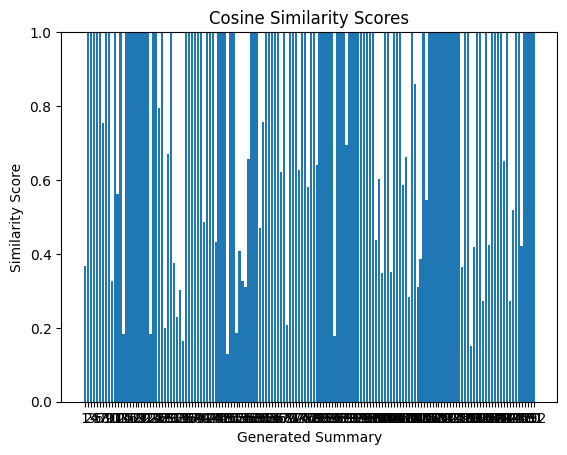

In [12]:
# Plotting the similarity scores
x_labels = [f"{i+1}" for i in range(len(list(billdf['Raw Text'])))]
plt.bar(x_labels, similarity_scores)
plt.xlabel("Generated Summary")
plt.ylabel("Similarity Score")
plt.title("Cosine Similarity Scores")
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()


Text(0.5, 1.0, 'Figure 2: Cosine Similarity Scores: All Bills')

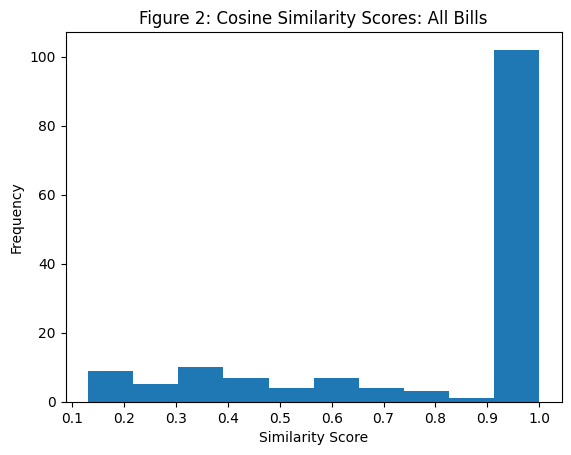

In [98]:
plt.hist(similarity_scores)
plt.xticks([0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.title("Figure 2: Cosine Similarity Scores: All Bills")

In [44]:
#22 shorter
s = billdf.loc[[9, 13, 22, 27, 30, 31, 32, 33, 40, 48, 51, 53, 68, 84, 100, 103, 109, 112, 113, 130, 136, 143], :]

# Billdf

In [85]:
import textstat

full_text = billdf['Raw Text']
fleschfull = []

for bill in full_text:
    a = textstat.flesch_reading_ease(bill)
    fleschfull.append(a)

print("Readibility score for full bill is ", np.mean(fleschfull))

Readibility score for full bill is  9.894144736842106


In [86]:
fleschsum = []

summary_text = billdf['summary']
for bill in summary_text:
    a = textstat.flesch_reading_ease(bill)
    fleschsum.append(a)

print("Readibility score for summarized bill is ", np.mean(fleschsum))

Readibility score for summarized bill is  9.266907894736843


In [87]:
diff = []
for i in range(0, len(fleschfull)):
    d = fleschfull[i]- fleschsum[i]
    diff.append(d)

print(diff)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6199999999999992, 0.0, 0.0, 0.0, -1.2199999999999989, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.900000000000002, 0.0, 0.0, 0.0, 0.0, 37.55, 0.0, 0.0, 24.189999999999998, -4.16, -5.83, -5.579999999999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.969999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.009999999999998, 0.0, 0.0, -5.479999999999997, 0.0, -14.149999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0100000000000016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.7100000000000009, 0.0, 0.0, 10.35, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3299999999999983, 0.0, 0.0, 2.1400000000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.72, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8500000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.40000000000000213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

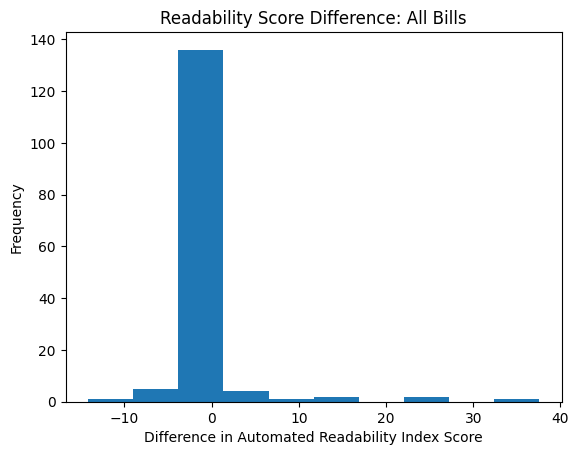

In [88]:

plt.hist(diff)
plt.title('Readability Score Difference: All Bills')
plt.xlabel('Difference in Automated Readability Index Score')
plt.ylabel('Frequency')
plt.show()

In [89]:
full_text = billdf['Raw Text']

autoreadfull = []

for bill in full_text:
    a = textstat.automated_readability_index(bill)
    autoreadfull.append(a)

print("Readibility score for full bill is ", np.mean(autoreadfull))

Readibility score for full bill is  31.06842105263158


In [90]:
summary_text = billdf['summary']

autoreadsum = []

for bill in summary_text:
    a = textstat.automated_readability_index(bill)
    autoreadsum.append(a)

print("Readibility score for summarized bill is ", np.mean(autoreadsum))

Readibility score for summarized bill is  31.36776315789474


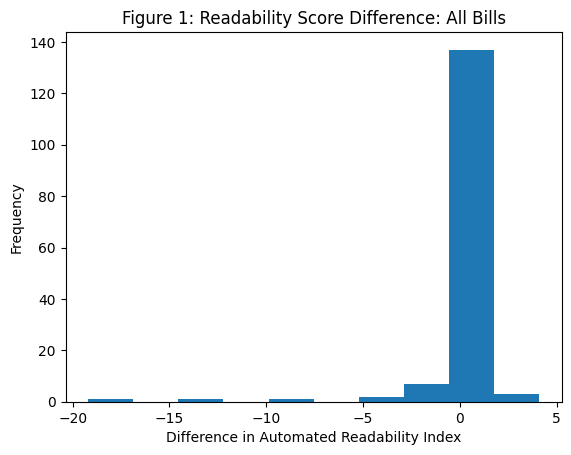

In [93]:
diff = []
for i in range(0, len(autoreadfull)):
    d = autoreadfull[i]- autoreadsum[i]
    diff.append(d)

plt.hist(diff)
plt.title('Figure 1: Readability Score Difference: All Bills')
plt.xlabel('Difference in Automated Readability Index')
plt.ylabel('Frequency')
plt.show()

# Shortdf

In [46]:
full_text = shortdf['Raw Text']
fleschfull = []

for bill in full_text:
    a = textstat.flesch_reading_ease(bill)
    fleschfull.append(a)

print("Readibility score for full bill is ", np.mean(fleschfull))

Readibility score for full bill is  13.372035398230091


In [43]:
fleschsum = []

summary_text = shortdf['summary']
for bill in summary_text:
    a = textstat.flesch_reading_ease(bill)
    fleschsum.append(a)

print("Readibility score for summarized bill is ", np.mean(fleschsum))

Readibility score for summarized bill is  12.528318584070798


In [67]:
full_text = shortdf['Raw Text']

autoreadfull = []

for bill in full_text:
    a = textstat.automated_readability_index(bill)
    autoreadfull.append(a)

print("Readibility score for full bill is ", np.mean(autoreadfull))

Readibility score for full bill is  29.572566371681415


In [78]:
summary_text = shortdf['summary']

autoreadsum = []

for bill in summary_text:
    a = textstat.automated_readability_index(bill)
    autoreadsum.append(a)

print("Readibility score for summarized bill is ", np.mean(autoreadsum))

Readibility score for summarized bill is  29.97522123893805


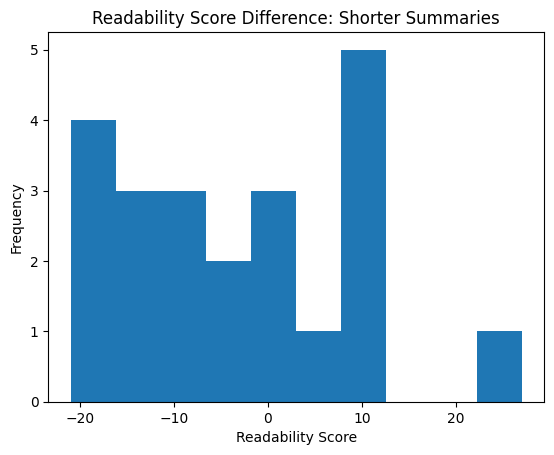

In [81]:
diff = []
for i in range(0, len(autoreadfull)):
    d = autoreadfull[i]- autoreadsum[i]
    diff.append(d)

plt.hist(diff)
plt.title('Readability Score Difference: Shorter Summaries')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.show()

# S df

In [47]:
full_text = s['Raw Text']
fleschfull = []

for bill in full_text:
    a = textstat.flesch_reading_ease(bill)
    fleschfull.append(a)

print("Readibility score for full bill is ", np.mean(fleschfull))

Readibility score for full bill is  10.780454545454544


In [45]:
fleschsum = []

summary_text = s['summary']
for bill in summary_text:
    a = textstat.flesch_reading_ease(bill)
    fleschsum.append(a)

print("Readibility score for summarized bill is ", np.mean(fleschsum))

Readibility score for summarized bill is  6.446818181818182


In [99]:
full_text = s['Raw Text']

autoreadfull = []

for bill in full_text:
    a = textstat.automated_readability_index(bill)
    autoreadfull.append(a)

print("Readibility score for full bill is ", np.mean(autoreadfull))

Readibility score for full bill is  28.74545454545455


In [100]:
summary_text = s['summary']

autoreadsum = []

for bill in summary_text:
    a = textstat.automated_readability_index(bill)
    autoreadsum.append(a)

print("Readibility score for summarized bill is ", np.mean(autoreadsum))

Readibility score for summarized bill is  30.813636363636363


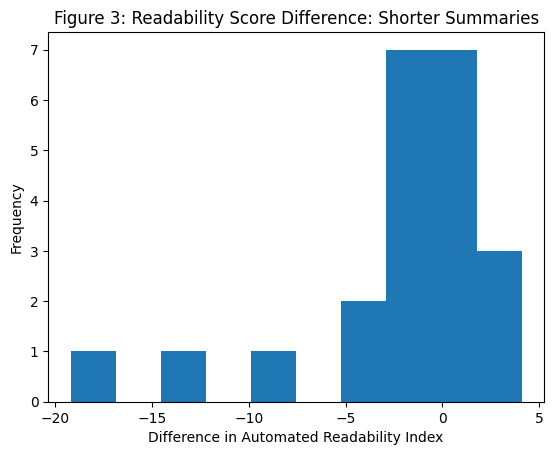

In [102]:
diff = []
for i in range(0, len(autoreadfull)):
    d = autoreadfull[i]- autoreadsum[i]
    diff.append(d)

plt.hist(diff)
plt.title('Figure 3: Readability Score Difference: Shorter Summaries')
plt.xlabel('Difference in Automated Readability Index')
plt.ylabel('Frequency')
plt.show()

In [7]:
list(billdf['Raw Text'])[36]

'This Act may be cited as the Not later than 180 days after the date of enactment of this Act, inclined sleepers for infants, regardless of the date of manufacture, shall be considered a banned hazardous product under section 8 of the Consumer Product Safety Act (In this section, the term Not later than 180 days after the date of enactment of this Act, crib bumpers, regardless of the date of manufacture, shall be considered a banned hazardous product under section 8 of the Consumer Product Safety Act (In this section, the term means any material that is intended to cover the sides of a crib to prevent injury to any crib occupant from impacts against the side of a crib or to prevent partial or complete access to any openings in the sides of a crib to prevent a crib occupant from getting any part of the body entrapped in any opening;includes a padded crib bumper, a supported and unsupported vinyl bumper guard, and vertical crib slat covers; anddoes not include a non-padded mesh crib line

In [8]:
list(billdf['summary'])[36]

'This Act may be cited as the Not later than 180 days after the date of enactment of this Act, inclined sleepers for infants, regardless of the date of manufacture, shall be considered a banned hazardous product under section 8 of the Consumer Product Safety Act (In this section, the term Not later than 180 days after the date of enactment of this Act, crib bumpers, regardless of the date of manufacture, shall be considered a banned hazardous product under section 8 of the Consumer Product Safety Act (In this section, the term means any material that is intended to cover the sides of a crib to prevent injury to any crib occupant from impacts against the side of a crib or to prevent partial or complete access to any openings in the sides of a crib to prevent a crib occupant from getting any part of the body entrapped in any opening;includes a padded crib bumper, a supported and unsupported vinyl bumper guard, and vertical crib slat covers; anddoes not include a non-padded mesh crib line

In [3]:
def check_same_length(str1, str2):
    return len(str1) < len(str2)

for i in range(0, len(list(billdf['Raw Text']))):
    print(check_same_length(list(billdf['summary'])[i], list(billdf['Raw Text'])[i]))


False
True
True
False
True
False
False
True
True
True
True
False
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
False
False
True
True
True
True
False
True
False
True
True
True
True
True
False
True
False
True
True
True
True
True
False
True
False
True
False
True
True
True
True
False
False
False
True
True
True
True
False
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
False
True
True
False
True
True
False
False
True
True
False
True
False
False
True
True
True
True
True
True
False
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
False
True
False
True
False
False
True
True
True
True


In [5]:
def check_same_length(str1, str2):
    return len(str2) - len(str1)

for i in range(0, len(list(billdf['Raw Text']))):
    print(check_same_length(list(billdf['summary'])[i], list(billdf['Raw Text'])[i]))


0
1
1
0
1
0
0
1
1
120
1
0
1
5409
0
1
1
1
1
0
1
1
1610937
1
1
1
1
2545394
0
0
16807
1107
21562
2982
0
1
0
1
1
1
2721
1
0
1
0
1
1
1
3668
1
0
812101
0
1893
0
1
1
1
1
0
0
0
1
1
1
1
0
1
455293
2
1
1
1
1
1
0
0
1
1
1
1
1
1
1
283602
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
716
0
0
54573
1
0
1
0
0
5581
1
1
10875
372
1
0
0
1
0
1
1
1
1
1
1
1
1
2
1
1
3244300
1
0
1
1
1
7701
1
1
1
1
1
0
1101
0
1
0
0
1
1
1
1


In [11]:
len(list(billdf['summary'])[22])

74739

In [21]:
list(billdf['summary'])[109]

'This Act may be known as the All products of the Russian Federation classified under chapter 27 of the Harmonized Tariff Schedule of the United States shall be banned from importation into the United States, in a manner consistent with any implementation actions issued under Executive Order 14066 (87 Fed. A motion to reconsider the vote by which the motion is disposed of shall not be in order. All points of order against the joint resolution and against its consideration are waived. A joint resolution of disapproval introduced in the Senate shall be referred to the Committee on Finance.If the Committee on Finance has not reported such joint resolution of disapproval within 10 days on which the Senate is in session after the date of referral of such joint resolution, that committee shall be discharged from further consideration of such joint resolution and the joint resolution shall be placed on the appropriate calendar.Notwithstanding Rule XXII of the Standing Rules of the Senate, it 

In [12]:
len(list(billdf['Raw Text'])[22])

1685676

In [22]:
list(billdf['Raw Text'])[109]

'This Act may be known as the All products of the Russian Federation classified under chapter 27 of the Harmonized Tariff Schedule of the United States shall be banned from importation into the United States, in a manner consistent with any implementation actions issued under Executive Order 14066 (87 Fed. Reg. 13625; relating to prohibiting certain imports and new investments with respect to continued Russian Federation efforts to undermine the sovereignty and territorial integrity of Ukraine).The President is authorized to terminate the prohibition on importation of energy products of the Russian Federation under section 2 if the President submits to Congress a certification under subsection (c). Such termination shall take effect beginning on the date that is 90 calendar days after the date of submission of such certification, unless there is enacted into law during such 90-day period a joint resolution of disapproval.The President shall, not later than 45 calendar days before submi

In [35]:
#22 shorter
s = billdf.loc[[9, 13, 22, 27, 30, 31, 32, 33, 40, 48, 51, 53, 68, 84, 100, 103, 109, 112, 113, 130, 136, 143], :]

In [26]:
similarity_scores2 = []

for i in range(0, len(list(shortdf['Raw Text']))):
    sim = calculate_similarity(list(shortdf['Raw Text'])[i], list(shortdf['summary'])[i])
    similarity_scores2.append(sim)

In [27]:
similarity_scores2

[0.999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 0.32737872197485135,
 1.0000000000000002,
 1.000000000000001,
 0.18386597060337173,
 0.9999999999999998,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.1834568505273249,
 1.0000000000000004,
 1.0000000000000002,
 0.795354849077357,
 1.0000000000000004,
 0.19916135359311882,
 0.37453175544248163,
 0.2279430986819985,
 0.30228427996136686,
 0.16515055426718098,
 1.0000000000000002,
 0.9999999999999993,
 1.0000000000000002,
 1.0000000000000002,
 0.4874565109641088,
 1.0000000000000002,
 1.0000000000000004,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.13043917025149437,
 1.0000000000000002,
 0.1849585239901901,
 0.3253706518676526,
 0.6557828023040895,
 0.9999999999999993,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999997,
 1.0000000000000002,
 0.9999999999999991,
 1.0000000000000002,
 1.0000000000000002,
 0.

In [28]:
import numpy as np
np.mean(similarity_scores2)

0.8220318075558838

Text(0.5, 1.0, 'Cosine Similarity Scores')

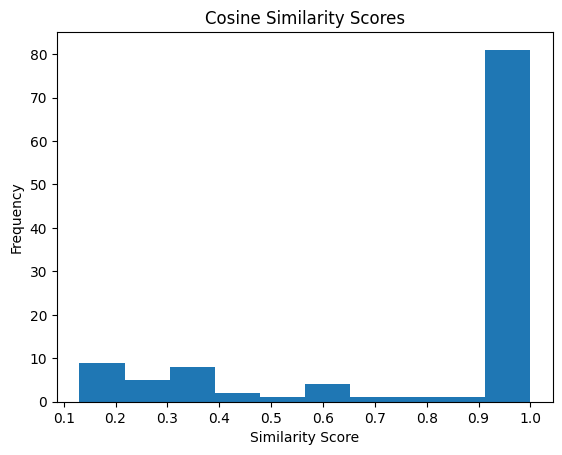

In [30]:
plt.hist(similarity_scores2)
plt.xticks([0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.title("Cosine Similarity Scores")

In [36]:
similarity_scores3 = []

for i in range(0, len(list(s['Raw Text']))):
    sim = calculate_similarity(list(s['Raw Text'])[i], list(s['summary'])[i])
    similarity_scores3.append(sim)

In [37]:
similarity_scores3

[0.32737872197485135,
 0.18386597060337173,
 0.1834568505273249,
 0.19916135359311882,
 0.37453175544248163,
 0.2279430986819985,
 0.30228427996136686,
 0.16515055426718098,
 0.4874565109641088,
 0.13043917025149437,
 0.1849585239901901,
 0.3253706518676526,
 0.20733956885448887,
 0.17768101320612267,
 0.3493810910012993,
 0.3518378573854038,
 0.28389043834314437,
 0.3101279666041165,
 0.3861533518087221,
 0.1497822726487661,
 0.4232829723510917,
 0.2716746178637027]

In [38]:
np.mean(similarity_scores3)

0.2728703905541817

Text(0.5, 1.0, 'Figure 4: Cosine Similarity Scores For Shorter Summaries')

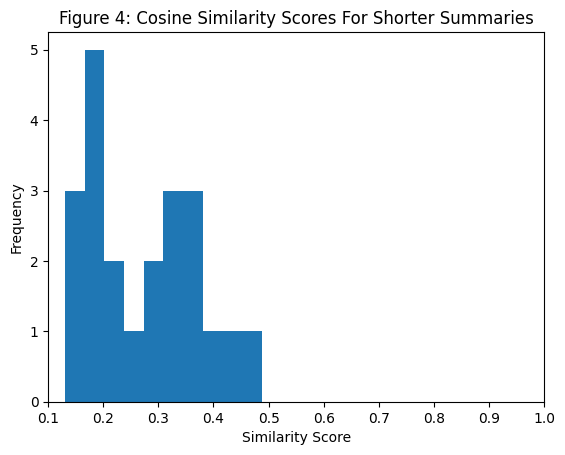

In [104]:
plt.hist(similarity_scores3)
plt.xticks([0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.title("Figure 4: Cosine Similarity Scores For Shorter Summaries")